In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
im1 = plt.imread('Duivenvoorden_Adriaan.png')
im2 = plt.imread('act.png')

In [3]:
im1.shape, im2.shape

((853, 1280, 4), (1200, 1800, 3))

In [4]:
#convert im2 to RGBA by adding a column for A
im2 = np.concatenate((im2, np.ones_like(im2[:,:,:1])), axis=-1)

In [5]:
# resize to same size and square
im1 = im1[:, int((im1.shape[1]-im1.shape[0])/2):int((im1.shape[1]+im1.shape[0])/2)]
im2 = im2[:im1.shape[0], :im1.shape[1]]
print(im1.shape, im2.shape)

(853, 853, 4) (853, 853, 4)


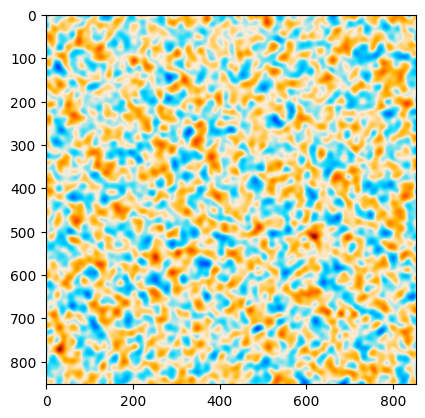

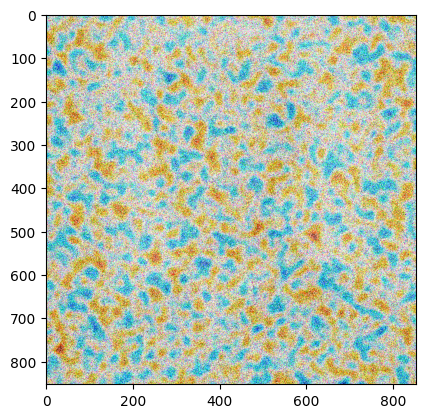

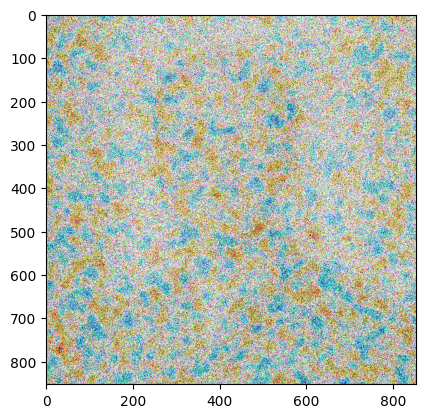

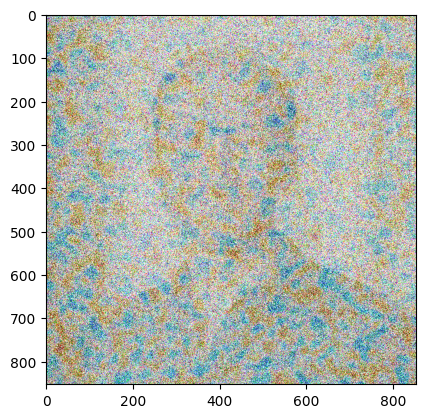

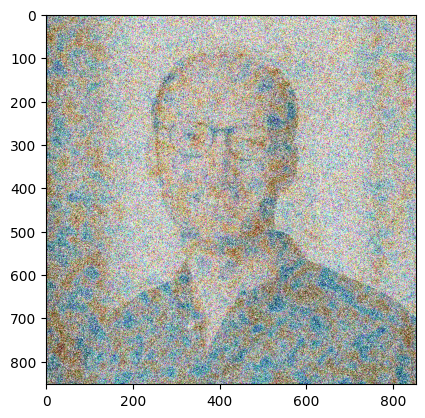

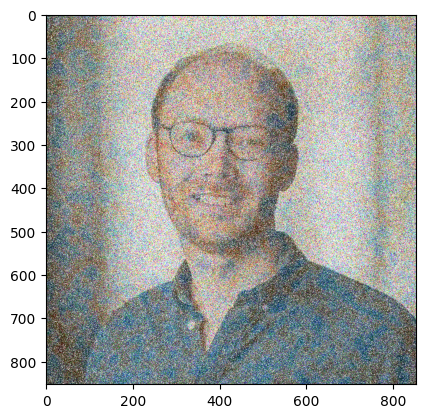

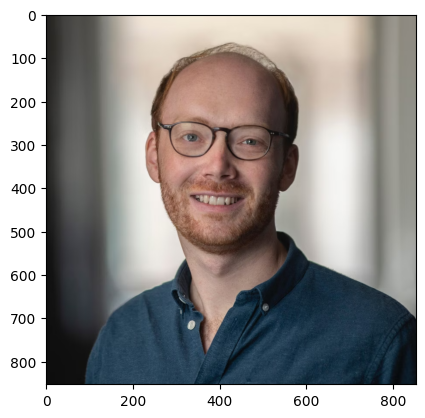

In [9]:
N = 6
for n in range(N+1):
    im = n/N * im1 + (N-n)/N * im2   # mix images
    std = 1   # strength of noise
    im = im * np.random.normal(1, np.abs((n-N/2)**2-(N/2)**2) / (N/2)**2 * std, im2.size).reshape(im2.shape)  # add noise to mimic diffusion (0 on boundaries) 
    im = np.clip(im, 0, 1)   # clip to range 0, 1 so it's a valid RGBA value
    plt.figure()
    plt.imshow(im)
    plt.imsave('adri_cmb_%d_%d.png'%(n, N), im)